In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [4]:

data = pd.read_csv('../data/clean.csv')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
import time
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
# feature names as an Index (panda object including a list of column names and dtype)
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [9]:
# y includes our labels and x includes our features
y = data['diagnosis']                   # M or B 
list = ['diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

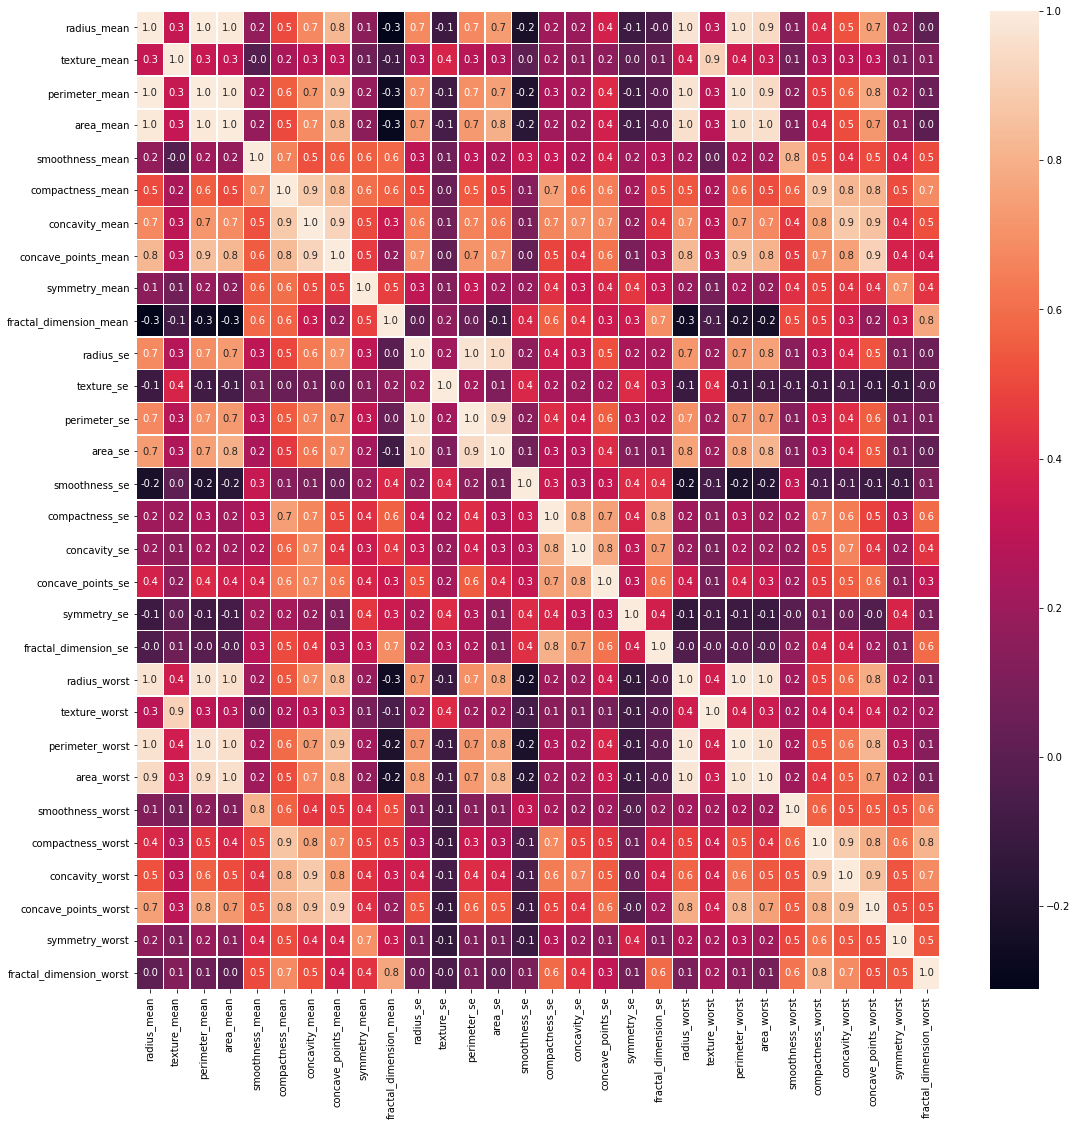

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Feature Selection with correlation and Random Forest classification

In [13]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concavity_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concavity_worst','compactness_se','concavity_se','texture_worst','area_worst']
x_1 = x.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.01587,0.03003,0.006193,0.1622,0.2654,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01340,0.01389,0.003532,0.1238,0.1860,0.2750,0.08902
2,21.25,1203.0,0.10960,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.02058,0.02250,0.004571,0.1444,0.2430,0.3613,0.08758
3,20.38,386.1,0.14250,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.01867,0.05963,0.009208,0.2098,0.2575,0.6638,0.17300
4,14.34,1297.0,0.10030,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.01885,0.01756,0.005115,0.1374,0.1625,0.2364,0.07678


After dropping correlated features, we end up with a heatmap matrix that is almost uncorrelated :

<AxesSubplot:>

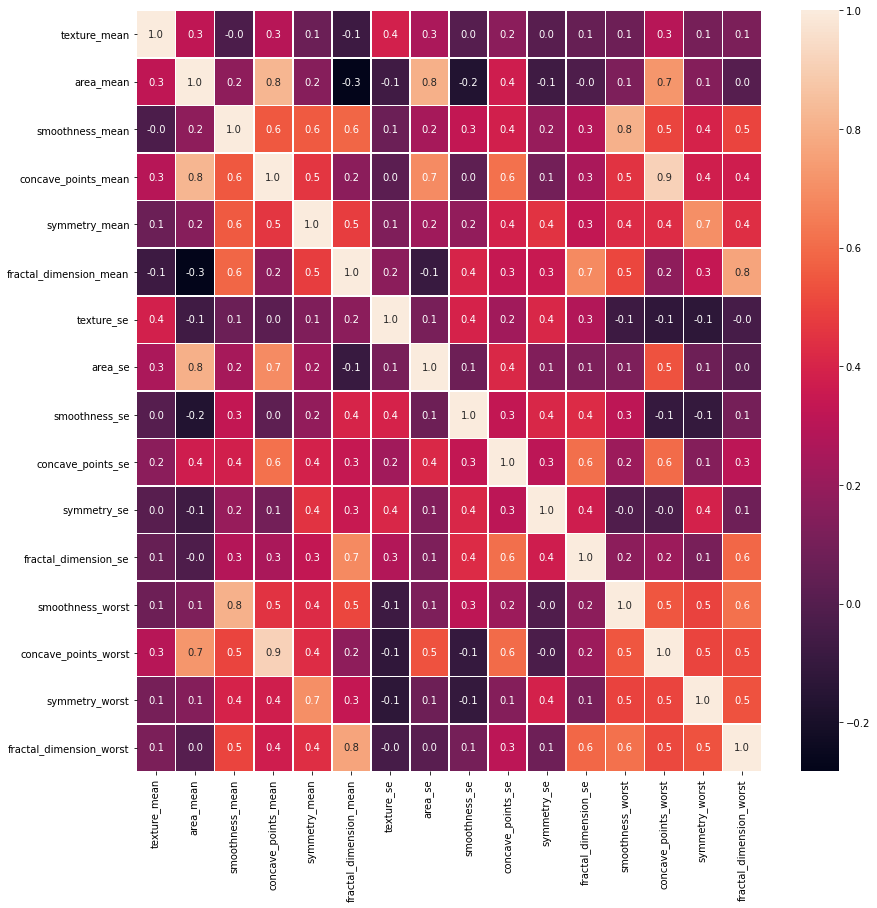

In [14]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

We reduced the number of features from 30 to 16. To check if our feature selection is correct, let's use the Random Forest algorithm and find the recall for the chosen features.

Recall is:  0.9206349206349206
Accuracy is:  0.9473684210526315
F1 score is:  0.9279999999999999


<AxesSubplot:>

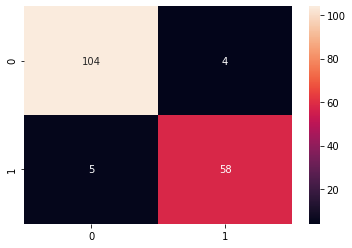

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

#It appears that the function recall_score needs to have y in a binary format, unlike accuracy_score can
#take into account the alphabetical format too.
#We write y in the binary format, with B=0 and M=1
y = y.replace("B", 0)
y = y.replace("M", 1)

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

recall = recall_score(y_test,clf_rf.predict(x_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,clf_rf.predict(x_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

### Recursive feature elimination (RFE) with Random Forest
RFE uses one of the classification methods (random forest in our example), assign weights to each feature. Whose absolute weights are the smallest are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features is reached.

In [ ]:
#Like the previous method, we will use 16 features, however this time the 16 features will be computed through the RFE.

In [16]:
from sklearn.feature_selection import RFE

# split data train 70 % and test 30, this time with x and not x_1 in order to have all the features %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create the RFE object and rank each pixel
clf_rf_2 = RandomForestClassifier(random_state=43)      
rfe = RFE(estimator=clf_rf_2, n_features_to_select=16, step=1)
rfe = rfe.fit(x_train, y_train)

In [17]:
print('Chosen best 16 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 16 feature by rfe: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave_points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst'],
      dtype='object')


Chosen 16 best features by rfe are different than the one obtained with the previous naive method. Therefore we do need to calculate recall again.

Recall is:  0.9365079365079365
Accuracy is:  0.9649122807017544
F1 score is:  0.9516129032258064


<AxesSubplot:>

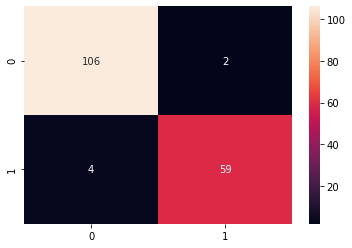

In [18]:
recall = recall_score(y_test,rfe.predict(x_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,rfe.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,rfe.predict(x_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,rfe.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Recall is 93.7%, slighlty better than the previous naive approach for the same classifier with the same Random_State and the same test set. Let's now find the optimal number of features !

### Recursive feature elimination with cross validation and Random Forest classification
Scikit proposes an algorithm that automatically finds the optimal number (and choice) of features required for best scoring, the RFECV.

The idea is to apply the previous RFE with an additional hyperparameter that is the appropriate number of features. The algorithm will evaluate the generalisation error obtained by keeping N features, and choose N in order to minimize the generalisation error (or maximize the recall). The computation of the generalisation error is based on a k-fold cross validation, with k being another (problematic ?) hyperparameter. Let's use the technique with a 5-fold cross validation and with a Random_state of 43.

In [19]:
from sklearn.feature_selection import RFECV

clf_rf_3 = RandomForestClassifier(random_state=43) 
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5, scoring='recall')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave_points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst'],
      dtype='object')


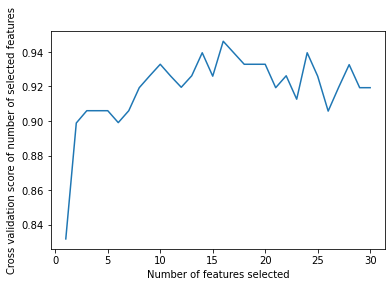

In [20]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Improving the estimate of the generalization error

First of all, let's look at the evolution of the recall found with the RFECV with a fixed k-fold cross validation, but a varying Random_state :

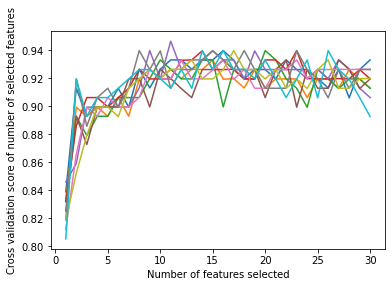

In [21]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")

for rs in range(10):
    clf_rf_4 = RandomForestClassifier(random_state = rs)
    rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5, scoring='recall')   #5-fold cross-validation
    rfecv = rfecv.fit(x_train, y_train)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()

Let's now look at the evolution of the optimal number of features :

In [22]:
opt_features = []
for rs in range(10):
    clf_rf_4 = RandomForestClassifier(random_state = rs) 
    rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5, scoring='recall')   #5-fold cross-validation
    rfecv = rfecv.fit(x_train, y_train)
    opt_features.append(rfecv.n_features_)
print("Number of optimal features :", opt_features)

Number of optimal features : [16, 15, 20, 23, 11, 22, 12, 8, 17, 14]


The number of optimal features fluctuates a lot for a same classifier. It is therefore quite erroneous to base our understanding of the optimal feature selection on a single occurence of the cross validation.

 What can we do about it ?

First step : averaging the solutions of the RFECV to obtain an averaged-RFECV

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")

number_of_random_states = 100
average_optimal = np.zeros(30)

for rs in range(number_of_random_states):
    clf_rf_4 = RandomForestClassifier(random_state = rs)
    rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5, scoring='recall')   #5-fold cross-validation
    rfecv = rfecv.fit(x_train, y_train)
    average_optimal += np.asarray(rfecv.grid_scores_)
average_optimal /= number_of_random_states    
plt.plot(range(1, len(rfecv.grid_scores_) + 1), average_optimal)
print("Number of features selected :", np.argmax(average_optimal)+1)
print("Evaluation of the optimal recall :", np.max(average_optimal))
plt.show()

Second step : but what are these 11 features 

The previous algorithme gave you the best number of features, statistically speaking, but we lost the information provided by the determinist RFECV, that is the set of features itself. To retrieve this information, let's use a RFE algorithm with a fixed number of 11 features. We choose the features that appear most often in the solution. Let's do both.

Everytime a feature appears in the solution, I increment its weight by 1.

In [ ]:
from collections import Counter

most_appearing_features = []

for rs in range(10):
    # Create the RFE object and rank each pixel
    clf_rf_2 = RandomForestClassifier(random_state=rs)      
    rfe = RFE(estimator=clf_rf_2, n_features_to_select=11, step=1)
    rfe = rfe.fit(x_train, y_train)
    most_appearing_features.append(x_train.columns[rfe.support_].tolist())
most_appearing_features = [item for sublist in most_appearing_features for item in sublist] #flatten the list

print('Most appearing features :')
Counter(most_appearing_features).most_common(11) #find the 11 most common features

Now that we have our set of 11 features, let's compute our final recall. To do so, we use a training with this 11 features, for a large number of random_states.

In [ ]:
drop_list = ["radius_se","texture_se","perimeter_mean","perimeter_se","area_mean","smoothness_mean","smoothness_se","smoothness_worst","compactness_mean","compactness_se","compactness_worst","concavity_se","concave points_se","symmetry_mean","symmetry_se","symmetry_worst","fractal_dimension_mean","fractal_dimension_se","fractal_dimension_worst"]
print("Number of eliminated features :", len(drop_list))
x_2 = x.drop(drop_list,axis = 1)        # do not modify x, we will use it later 
x_2.head()

In [ ]:
x_2.to_csv("../data/features.csv", index=False)

In [ ]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_2, y, test_size=0.3, random_state=42)

number_of_random_states = 10
recall = 0

for rs in range(number_of_random_states):
    #random forest classifier with n_estimators=10 (default)
    clf_rf = RandomForestClassifier(random_state=rs)      
    clr_rf = clf_rf.fit(x_train,y_train)
    recall += recall_score(y_test,clf_rf.predict(x_test))

recall /= number_of_random_states
print('Recall is: ', recall)